In [14]:
# External
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
# Std
import os
# Local
from lib.functions import show_sample_images
from CGAN import CGanNet

In [15]:
NET_NAME = "11_Last_CGAN"
BATCH_SIZE = 32
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
LEARNING_RATE_DISC: float = 0.0002
LEARNING_RATE_GAN: float = 0.0002
DROPOUT_RATE: float = 0.4
DENSE_UNITS=128
CONV_LAYERS = 2
BATCH_NORM = False

In [16]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [17]:
# Load flowers dataset
(flowers_training_set, flowers_validation_set), flowers_dataset_info = tfds.load(
    'oxford_flowers102',
    split=['test[:49%]', 'validation'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
flowers_dataset_size = flowers_dataset_info.splits['test[:49%]'].num_examples
print(f'Flower dataset size is: {flowers_dataset_size}')

Flower dataset size is: 3013


In [18]:
# Load birds dataset
(birds_training_set, birds_test_set), birds_dataset_info = tfds.load(
    'caltech_birds2010',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
birds_dataset_size = birds_dataset_info.splits['train'].num_examples
print(f'Birds dataset size is: {birds_dataset_size}')

Birds dataset size is: 3000


In [19]:
# Load dogs dataset
(dogs_training_set, dogs_test_set), dogs_dataset_info = tfds.load(
    'stanford_dogs',
    split=['train[:25%]', 'test'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
dogs_dataset_size = dogs_dataset_info.splits['train[:25%]'].num_examples
print(f'Dogs dataset size is: {dogs_dataset_size}')

Dogs dataset size is: 3000


In [20]:
# Preprocessing images
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    # image = image / 255.0
    image = (image - 127.5) / 127.5
    image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

    return image, label
flowers_train_batches = flowers_training_set.shuffle(flowers_dataset_size//4).map(format_image)
birds_train_batches = birds_training_set.shuffle(birds_dataset_size//4).map(format_image)
dogs_train_batches = dogs_training_set.shuffle(dogs_dataset_size//4).map(format_image)

# Get labels numbers to names map
labels_strings = {
    0: "Kwiat",
    1: "Ptak",
    2: "Pies"
}

In [21]:
# Create numpy arrays with images and labels
flowers_numpy_train_batches_images = np.array([_[0] for _ in flowers_train_batches])
flowers_numpy_train_batches_labels = np.array([0 for _ in flowers_train_batches])
birds_numpy_train_batches_images = np.array([_[0] for _ in birds_train_batches])
birds_numpy_train_batches_labels = np.array([1 for _ in birds_train_batches])
dogs_numpy_train_batches_images = np.array([_[0] for _ in dogs_train_batches])
dogs_numpy_train_batches_labels = np.array([2 for _ in dogs_train_batches])

In [22]:
numpy_train_batches_images = np.concatenate((dogs_numpy_train_batches_images, flowers_numpy_train_batches_images, birds_numpy_train_batches_images))
numpy_train_batches_labels = np.concatenate((dogs_numpy_train_batches_labels, flowers_numpy_train_batches_labels, birds_numpy_train_batches_labels))
dataset_size = flowers_dataset_size + birds_dataset_size + dogs_dataset_size

In [29]:
cgan = CGanNet(net_name=NET_NAME,
               batch_size=BATCH_SIZE,
               image_width=IMAGE_WIDTH,
               image_height=IMAGE_HEIGHT,
               learning_rate_disc= LEARNING_RATE_DISC,
               learning_rate_gan=LEARNING_RATE_GAN,
               dropout_rate= DROPOUT_RATE,
               generator_dense_units=DENSE_UNITS,
               num_conv_layers=CONV_LAYERS,
               batch_norm=BATCH_NORM,
               number_of_channels=3,
               latent_dimension=100,
               training_data=numpy_train_batches_images,
               labels_data=numpy_train_batches_labels,
               number_of_classes=3,
               labels_names = labels_strings,
               kernel_size=4)

In [30]:
# Define GAN models
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()

In [31]:
# cgan.train(number_of_epochs=1, load_past_model=False)

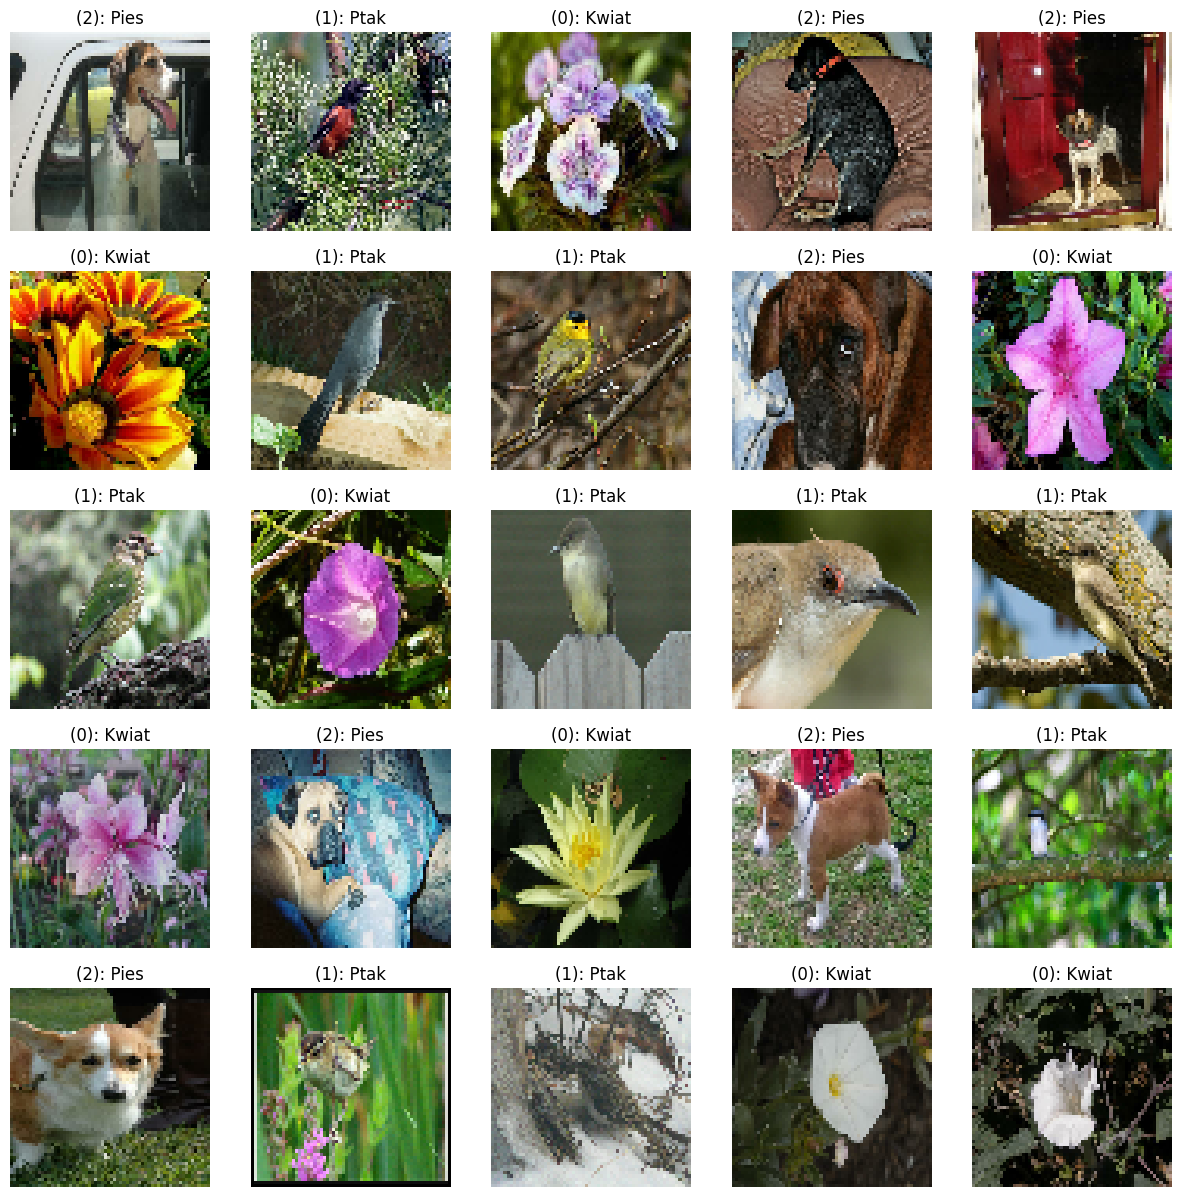

In [32]:
show_sample_images(numpy_train_batches_images, numpy_train_batches_labels, labels_strings, NET_NAME, dataset_size=dataset_size)

In [27]:
cgan.visualize_models()

In [ ]:
# cgan.train(number_of_epochs=1, load_past_model=True)

In [33]:
cgan.load_model()

----> Load epoch number: 2218 from file /home/kamil/Repositories/GAN_mg/11_Last_CGAN_data/.epoch


In [34]:
cgan.get_training_time()

----> Total training time: 31.0h 24.0m, 25s


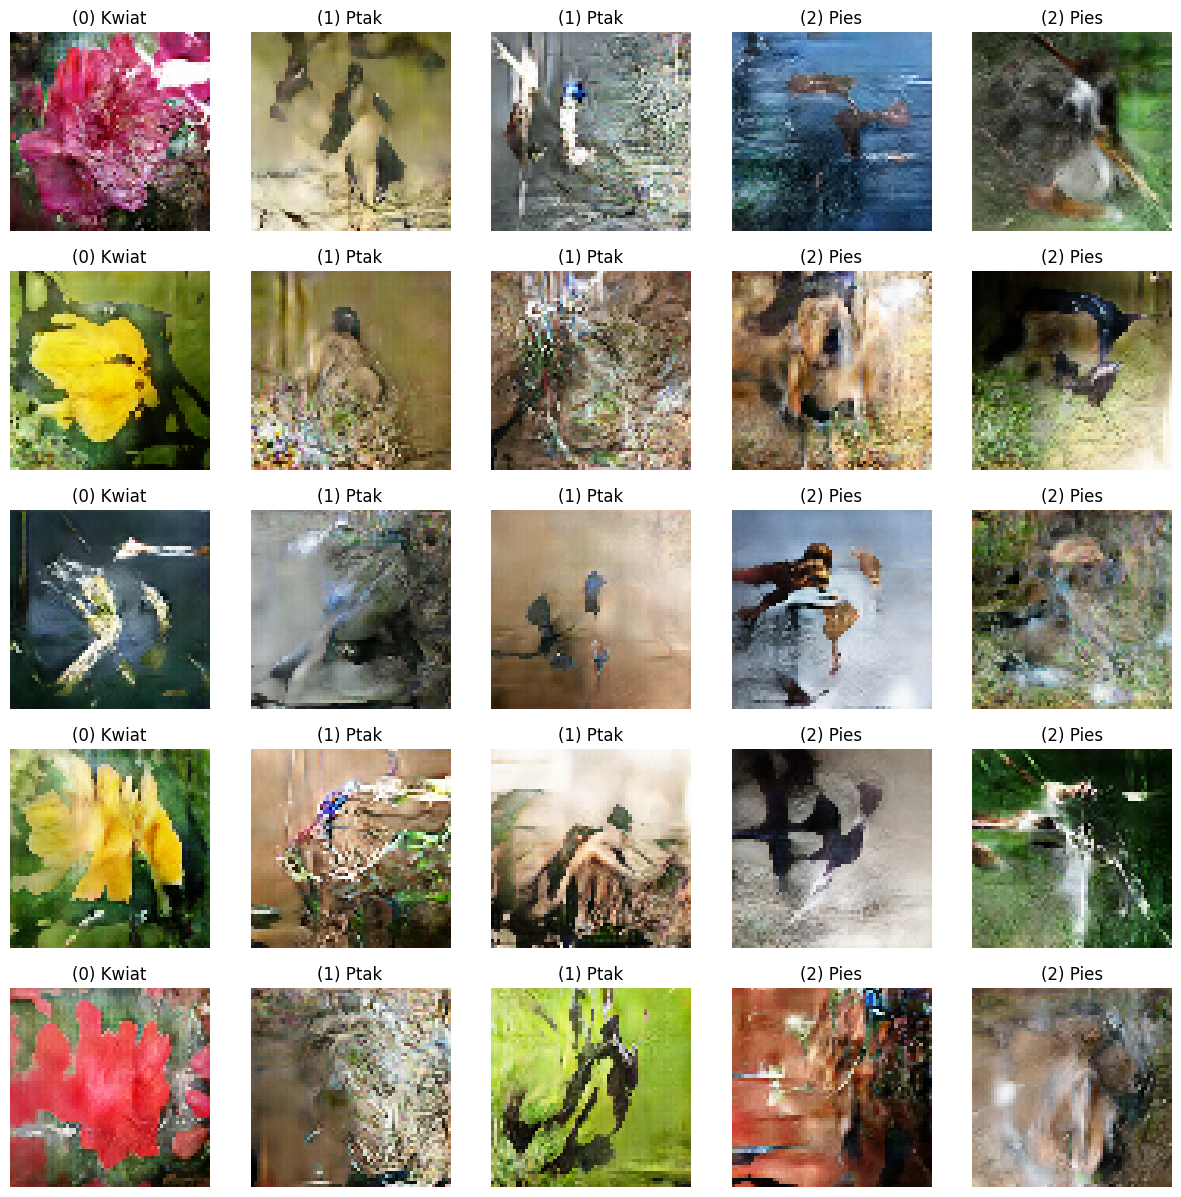

In [35]:
cgan.show_sample_images_with_labels()

In [ ]:
cgan.show_one_image_with_label(1)